In [1]:
import os
import sys
import json

sys.path.append(os.path.abspath('.'))
import api

In [2]:
data1_raw = '{"atoms":[{"position":{"x":-169.92187499999997,"y":-6.8359375},"symbol":"C"},{"position":{"x":-73.32929237109315,"y":19.045967010252074},"symbol":"C"},{"position":{"x":-23.32929237109316,"y":-67.5565733681918},"symbol":"C"},{"position":{"x":73.26329025781362,"y":-41.67466885793959},"symbol":"C"},{"position":{"x":-102.66462640021655,"y":-128.43271626906403},"symbol":"C"}],"bonds":[{"type":"single","from":0,"to":1},{"type":"single","from":1,"to":2},{"type":"single","from":2,"to":3},{"type":"single","from":2,"to":4}]}'
data2_raw = '{"atoms":[{"position":{"x":-73.32929237109315,"y":19.045967010252074},"symbol":"C"},{"position":{"x":-23.32929237109316,"y":-67.5565733681918},"symbol":"C"},{"position":{"x":-102.66462640021655,"y":-128.43271626906403},"symbol":"C"},{"position":{"x":13.273248007350745,"y":69.04596701025201},"symbol":"C"},{"position":{"x":-169.92187499999994,"y":44.92787152050422},"symbol":"C"}],"bonds":[{"type":"single","from":0,"to":1},{"type":"single","from":1,"to":2},{"type":"single","from":0,"to":3},{"type":"single","from":0,"to":4}]}'
data3_raw = '{"atoms":[{"position":{"x":-73.32929237109315,"y":19.045967010252074},"symbol":"C"},{"position":{"x":-23.32929237109316,"y":-67.5565733681918},"symbol":"C"},{"position":{"x":-102.66462640021655,"y":-128.43271626906403},"symbol":"C"},{"position":{"x":13.273248007350745,"y":69.04596701025201},"symbol":"C"},{"position":{"x":-169.92187499999994,"y":44.92787152050422},"symbol":"C"},{"position":{"x":74.74923566922992,"y":-87.06560556980449},"symbol":"C"}],"bonds":[{"type":"single","from":0,"to":1},{"type":"single","from":1,"to":2},{"type":"single","from":0,"to":3},{"type":"single","from":0,"to":4},{"type":"single","from":1,"to":5}]}'
data4_raw = '{"atoms":[{"position":{"x":-52.8731045490822,"y":-60.853950518755},"symbol":"C"},{"position":{"x":-139.47564492752605,"y":-10.853950518754964},"symbol":"C"},{"position":{"x":-52.873104549082285,"y":39.146049481245},"symbol":"C"},{"position":{"x":33.72943582936165,"y":-10.853950518754978},"symbol":"C"},{"position":{"x":43.719478079824626,"y":-86.73585502900704},"symbol":"C"},{"position":{"x":-65.92572377108733,"y":-159.99843665613605},"symbol":"C"}],"bonds":[{"type":"single","from":0,"to":1},{"type":"single","from":0,"to":2},{"type":"single","from":0,"to":3},{"type":"single","from":0,"to":4},{"type":"single","from":0,"to":5}]}'

In [3]:
api.validate(json.loads(data1_raw))

True

In [4]:
api.validate(json.loads(data4_raw))

False

In [5]:
api.compare(json.loads(data1_raw), json.loads(data2_raw))

True

In [6]:
api.compare(json.loads(data1_raw), json.loads(data3_raw))

False

In [7]:
ex1_cis = '{"atoms":[{"position":{"x":-84.26741393114492,"y":-40.23218574859888},"symbol":"C"},{"position":{"x":15.732586068855085,"y":-40.23218574859888},"symbol":"C"},{"position":{"x":102.33512644729896,"y":-90.23218574859888},"symbol":"Cl"},{"position":{"x":-170.86995430958876,"y":-90.23218574859897},"symbol":"Cl"}],"bonds":[{"type":"double","from":0,"to":1},{"type":"single","from":1,"to":2},{"type":"single","from":0,"to":3}]}'
ex1_trans = '{"atoms":[{"position":{"x":-84.26741393114492,"y":-40.23218574859888},"symbol":"C"},{"position":{"x":15.732586068855085,"y":-40.23218574859888},"symbol":"C"},{"position":{"x":65.7325860688551,"y":-126.83472612704274},"symbol":"Cl"},{"position":{"x":-134.26741393114494,"y":46.37035462984497},"symbol":"Cl"}],"bonds":[{"type":"double","from":0,"to":1},{"type":"single","from":1,"to":2},{"type":"single","from":0,"to":3}]}'

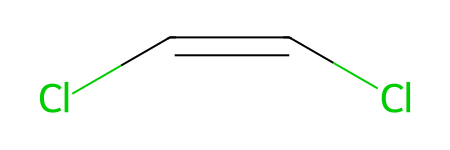

In [8]:
api.read_mol(json.loads(ex1_cis))

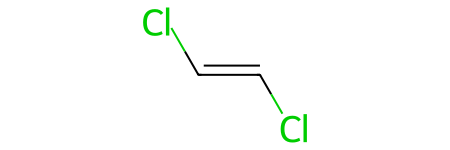

In [9]:
api.read_mol(json.loads(ex1_trans))

In [10]:
api.compare(json.loads(ex1_cis), json.loads(ex1_trans))

False